# Fashion Product and User Information

##### Description
This dataset captures essential details of Fashion products and user interactions, providing insights into product characteristics, brand performance, pricing, and user preferences across various product categories.
It can be used for data analysis in areas like customer behavior, product popularity, pricing strategies, and inventory management.

##### Questions the project answers
1. "How does the price distribution vary across different brands?"
2. How many products do most users tend to buy, and is there a common purchasing pattern?
3. What are the prices of individual products, and how do they compare across the range?
4. Most Common Product Colors?
5. Which categories and brands are most popular? Are there certain brands that dominate specific categories7,

In [4]:
#pip install pingouin

In [5]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pingouin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [6]:
#loading datset

df= pd.read_csv("fashion_products.csv")

## Data Inspection

In [8]:
#checking number of rows and columns

df.shape

(1000, 9)

In [9]:
#pulling out first five rows

df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [10]:
#Brief info on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [11]:
#statistical summary of the dataset

df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


In [12]:
df["Size"].unique()

array(['XL', 'L', 'S', 'M'], dtype=object)

In [13]:
df["Size"].value_counts().to_frame()

,count
Size,
XL,254
L,251
S,249
M,246


In [14]:
df["Color"].value_counts().to_frame()

,count
Color,
White,193
Yellow,175
Blue,172
Green,156
Black,154
Red,150


In [15]:
df.groupby("Brand")["Price"].sum().to_frame()

,Price
Brand,
Adidas,10596
Gucci,10587
H&M,11168
Nike,12320
Zara,11114


In [16]:
df["Product Name"].unique()

array(['Dress', 'Shoes', 'T-shirt', 'Jeans', 'Sweater'], dtype=object)

In [17]:
df["Category"].unique()

array(["Men's Fashion", "Women's Fashion", "Kids' Fashion"], dtype=object)

In [18]:
df["Color"].unique()

array(['Black', 'Yellow', 'White', 'Blue', 'Green', 'Red'], dtype=object)

In [19]:
#Double-Checking for Null Cells
df.isnull().sum().to_frame()

,0
User ID,0
Product ID,0
Product Name,0
Brand,0
Category,0
Price,0
Rating,0
Color,0
Size,0


In [20]:
#Checking for duplicates
df.duplicated().sum()

0

#### After inspection, we noticed 
- the data types of many columns need to be changed.
- column rating must be round off to one decimal place.
- product id column will not help in our analysis hence can be dropped.
- some columns need renaming.
- a new column should be created for our rating metrics.

In [22]:
#Changing Data Types
df["Product Name"]= df["Product Name"].astype("category")
df["Brand"]= df["Brand"].astype("category")
df["Category"]= df["Category"].astype("category")
df["Color"]= df["Color"].astype("category")
df["Size"]= df["Size"].astype("category")
df["Price"]= df["Price"].astype("float")

In [23]:
#Rounding the rating column to one decimal place
df["Rating"]=round(df["Rating"],1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   User ID       1000 non-null   int64   
 1   Product ID    1000 non-null   int64   
 2   Product Name  1000 non-null   category
 3   Brand         1000 non-null   category
 4   Category      1000 non-null   category
 5   Price         1000 non-null   float64 
 6   Rating        1000 non-null   float64 
 7   Color         1000 non-null   category
 8   Size          1000 non-null   category
dtypes: category(5), float64(2), int64(2)
memory usage: 37.2 KB


In [25]:
#Dropping a column
data=df.drop(["Product ID"], axis=1)

In [26]:
data.head()

,User ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,Dress,Adidas,Men's Fashion,40.0,1.0,Black,XL
1,97,Shoes,H&M,Women's Fashion,82.0,4.0,Black,L
2,25,Dress,Adidas,Women's Fashion,44.0,3.3,Yellow,XL
3,57,Shoes,Zara,Men's Fashion,23.0,1.0,White,S
4,79,T-shirt,Adidas,Men's Fashion,79.0,4.3,Black,M


# Data Transformation

In [28]:
#Renaming the columns
data=data.rename(columns={"User ID":"User_ID","Product Name":"Product", "Rating":"Rating_Scale"})
data.head()

,User_ID,Product,Brand,Category,Price,Rating_Scale,Color,Size
0,19,Dress,Adidas,Men's Fashion,40.0,1.0,Black,XL
1,97,Shoes,H&M,Women's Fashion,82.0,4.0,Black,L
2,25,Dress,Adidas,Women's Fashion,44.0,3.3,Yellow,XL
3,57,Shoes,Zara,Men's Fashion,23.0,1.0,White,S
4,79,T-shirt,Adidas,Men's Fashion,79.0,4.3,Black,M


In [29]:
#Creating a new column
#data["Rating_Scale"].value_counts()

In [30]:
labels=["Poor","Fair","Good","Very Good","Excellent"]
bins=[0.9,1.9,2.9,3.9,4.4,5.0]
data["Rating"]=pd.cut(data["Rating_Scale"],bins=bins, labels=labels)

In [31]:
data.head()

,User_ID,Product,Brand,Category,Price,Rating_Scale,Color,Size,Rating
0,19,Dress,Adidas,Men's Fashion,40.0,1.0,Black,XL,Poor
1,97,Shoes,H&M,Women's Fashion,82.0,4.0,Black,L,Very Good
2,25,Dress,Adidas,Women's Fashion,44.0,3.3,Yellow,XL,Good
3,57,Shoes,Zara,Men's Fashion,23.0,1.0,White,S,Poor
4,79,T-shirt,Adidas,Men's Fashion,79.0,4.3,Black,M,Very Good


## DATA VISUALIZATION

The price distribution box plot indicates that most of the products have prices in the range of about 30 dollars to 80 dollars. Jeans, shoes, and sweaters make up the majority of the products, according to the product distribution box plot. Lastly, the category distribution shows that all three categories are evenly distributed, indicating that the brand serves a variety of market niches.

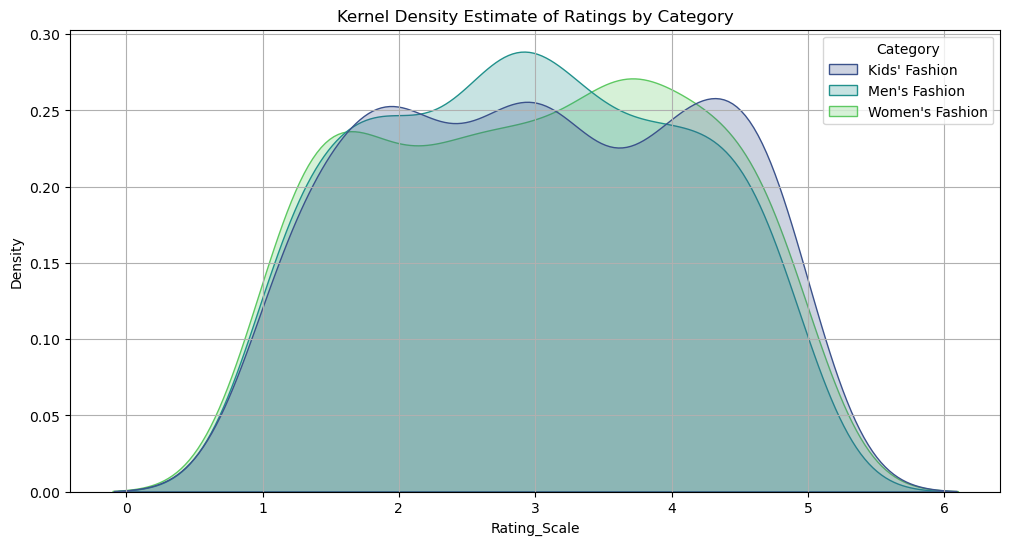

In [34]:
plt.figure(figsize=(12, 6))

# Create a KDE plot for each category
sns.kdeplot(data= data, x='Rating_Scale', hue='Category', fill=True, common_norm=False, palette='viridis')

plt.title('Kernel Density Estimate of Ratings by Category')
plt.xlabel('Rating_Scale')
plt.ylabel('Density')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('seaborn_plot6.png')

#Displaying chart
plt.show()

### Kernel Density Chart 
##### Rating Distributions by Fashion Category:
- Kids' Fashion shows the most variability in ratings, with distinct peaks at lower, average, and higher ratings, suggesting a mixed customer experience within this category.
- Men's and Women's Fashion have more consistent ratings, mostly concentrated between 3 and 4, with a slight edge for Women's Fashion at the higher end.

- Business Implications:

1. Kids' Fashion: The variability in ratings suggests some inconsistency in product quality or customer satisfaction. This category could benefit from further investigation to understand why certain products receive low ratings while others are highly rated.
2. Men's and Women's Fashion: These categories show more stable ratings, suggesting they’re generally well-received. However, improving features or quality slightly in Men's Fashion could help push it closer to the higher ratings seen in Women's Fashion.

- In summary, focusing on Kids' Fashion to address the lower-rated products and consistently improving Men's and Women's Fashion could help the brand increase overall customer satisfaction and ratings.

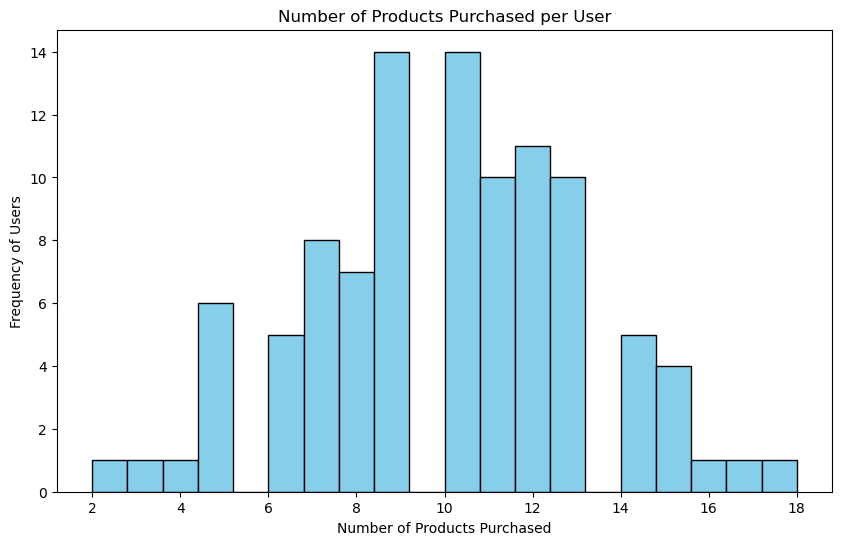

In [36]:
# Group by 'User' column and count the number of purchases per user
user_purchases = data.groupby('User_ID')['Product'].count()

# Plot histogram of purchases per user
plt.figure(figsize=(10, 6))
plt.hist(user_purchases, bins=20, color="skyblue", edgecolor="black")

# Set title and labels
plt.title("Number of Products Purchased per User")
plt.xlabel("Number of Products Purchased")
plt.ylabel("Frequency of Users")

# Show plot
plt.show()

##### Insights from the Histogram
- Peak Purchase Range: The most common purchase range is between 8 to 12 products. This means that most users tend to purchase around 8-12 items.
- Frequency Distribution: The graph has a relatively symmetric shape, peaking around 10 products per user, with fewer users making extremely low or high numbers of purchases.
- Outliers: There are a few users who have purchased either very few products (e.g., 2-4) or a high number of products (e.g., 16-18), but these cases are less frequent.

In [38]:
#Group the data by "Product" and calculate the Average Price
grouped_data = data.groupby('Product')['Price'].mean().reset_index()
grouped_data

,Product,Price
0,Dress,53.289773
1,Jeans,56.696970
2,Shoes,56.738739
3,Sweater,54.788235
4,T-shirt,56.711443


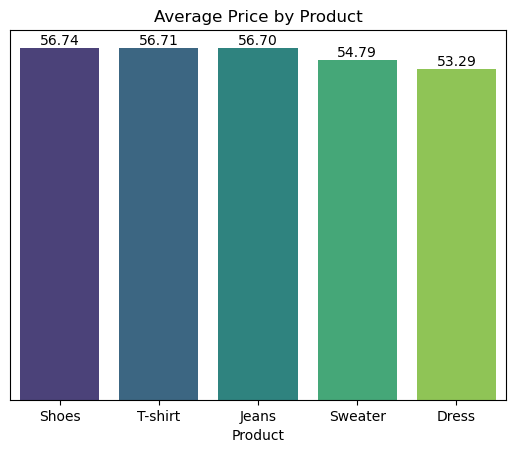

In [39]:
data_sample= {'Product': ['Dress', 'Jeans', 'Shoes', 'Sweater', 'T-shirt'],
        'Price': [53.29, 56.70, 56.74, 54.79, 56.71]}

# Create DataFrame
data_ = pd.DataFrame(data_sample)

#Group the data by "Product" and calculate the Average Price
grouped_data = data_.groupby('Product')['Price'].mean().reset_index()

#Sorting the grouped data by average price in descending order
sorted_data = grouped_data.sort_values('Price' , ascending=False)

#Create the bar plot
g = sns.barplot(x='Product', y='Price', data=sorted_data, palette='viridis')

# Set the title and labels
plt.title('Average Price by Product')
plt.xlabel('Product')
plt.ylabel('Average Price')

# Add data labels on each bar
for i in g.patches:
    height = i.get_height() 
    if not pd.isna(height):  
        g.text(i.get_x() + i.get_width() / 2, 
               height + 0.5,  
               f'{height:.2f}', 
               ha='center', fontsize=10)  
g.get_yaxis().set_visible(False)

# Save the plot as a PNG file
plt.savefig('seaborn_plot.png')

#Displaying chart
plt.show()

This bar chart illustrates the relationship between each product (x-axis) and price (y-axis). The height of each bar represents the total average price sales for each product, with specific price values displayed at the top of each bar for precision and easy reference. This chart shows a clear comparison of average sales recorded for different products namely, shoes, dress, sweater, jeans and t-shirt

In examining the data, we can observe that Shoes have the highest total average price at 56.74, closely followed by T-Shirts at 56.71, and Jeans at 56.70. Sweaters and Dresses are slightly lower, with average sale of 54.79 and 53.29, respectively. The close similarity in average prices across products suggests that sales and demand are relatively consistent, probably due to effective marketing efforts across the board.

Given this consistency, it could be beneficial to focus marketing efforts on sweaters and dresses to bring their average sales to be more in line with the higher sales items. Ensuring continued, strategic marketing across all items could help maintain or even increase the average sales, supporting steady growth in sales across all product categories. This analysis suggests that the current efforts are achieving balanced results, and with targeted adjustments, they could further improve sales outcomes across all products.


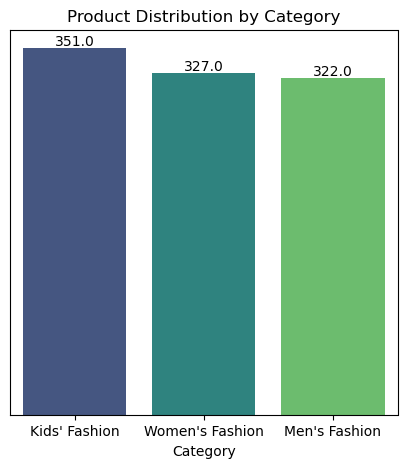

In [41]:
Stock= data.groupby("Category")["Product"].count().reset_index()
Stock.columns = ["Category", "Total"]

# Sort the data by Category in ascending order
sorted_data = Stock.sort_values("Total", ascending=False).reset_index(drop=True)

# Countplot diagram
plt.figure(figsize=(5, 5))
plot = sns.barplot(x="Category", y="Total" , data=sorted_data, palette="viridis", order=sorted_data["Category"])
plot.set(ylabel="anything")
plot.get_yaxis().set_visible(False)

# Add data labels
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width()/2.,
             height + 0.1, str(height), ha="center", va="bottom")
plt.title('Product Distribution by Category')

# Save the plot as a PNG file
plt.savefig('seaborn_plot1.png')

#Displaying chart
plt.show()

##### Overall Interpretation
The chart titled "Product Distribution by Category" displays the quantity of products sold across three distinct categories: Kids' Fashion, Men's Fashion, and Women's Fashion.
###### Detailed Observations
- Kids' Fashion clearly outperforms the other two categories in terms of product quantity. It holds a significant lead with 351.0 units sold, which is considerably higher than the other categories.
- Men's and Women's Fashion appear to be relatively close in terms of product sales. Men's Fashion has a slight edge with 327.0 units sold, compared to Women's Fashion's 322.0 units.

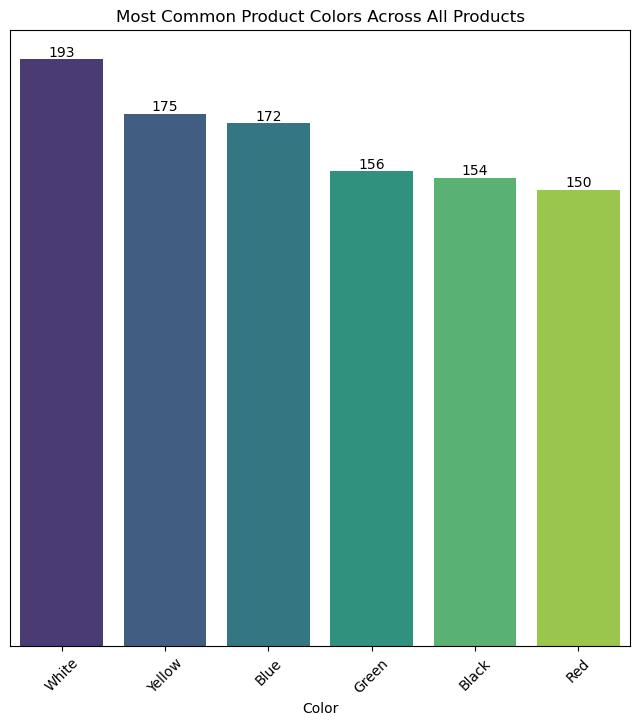

In [43]:
# Count the frequency of each color and sort by frequency in descending order
color_counts = data['Color'].value_counts().reset_index()
color_counts.columns = ['Color', 'Frequency']
color_counts = color_counts.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Plot color frequencies
plt.figure(figsize=(8, 8))
plot=sns.barplot(data=color_counts, x='Color', y='Frequency', palette='viridis', order=color_counts['Color'])
plt.title('Most Common Product Colors Across All Products')
plt.xlabel('Color')
plt.xticks(rotation=45)
plot.get_yaxis().set_visible(False)
# Add data labels with more space above the bars
for i, v in enumerate(color_counts['Frequency']):
    plt.annotate(str(v), (i, v), ha='center', va='bottom', fontsize=10)  # Adjusted offset for better visibility

# Save the plot as a PNG file
plt.savefig('seaborn_plot2.png')

#Displaying chart
plt.show()


#### Distribution of Colors: 

The bar chart shows the distribution of preferred colors across different products.

Color Values and Trend among the category : 
White has the highest value (193), while Red has the lowest value (150), which means white is the common preferred color across the fashion categories (Men, Women and Kids) while Red is the least preferred

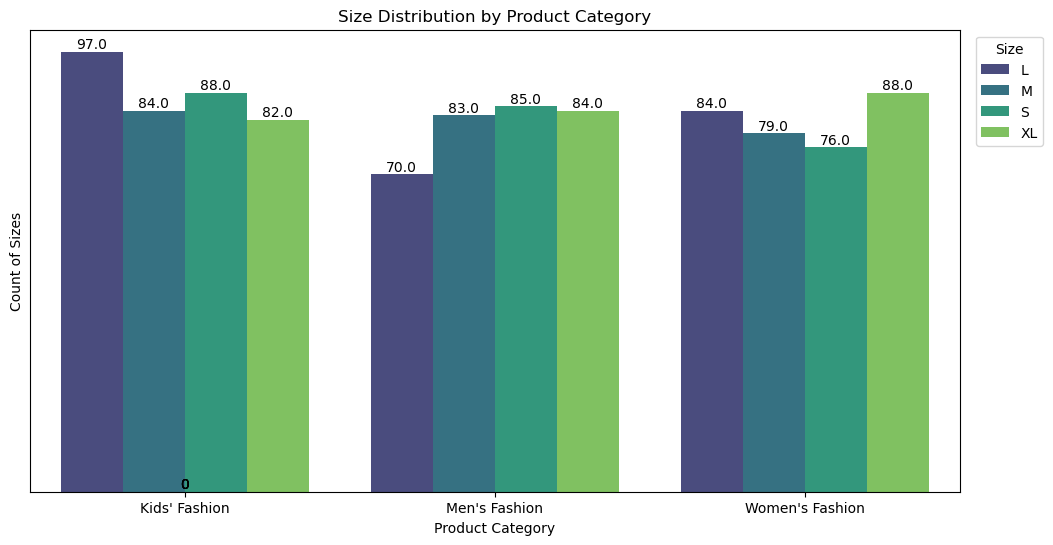

In [45]:
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values(by= "Size")
ax = sns.countplot(data=df, x='Category', hue='Size', palette='viridis')
plt.title('Size Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count of Sizes')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Remove y-axis
plt.yticks([])

plt.legend(title='Size', bbox_to_anchor=(1.01, 1), loc='upper left')
#plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig('seaborn_plot3.png')

#Displaying chart
plt.show()

##### Overall Analysis
- The distribution of sizes varies across the three categories, indicating different sizing preferences for different demographics.

##### Size Distribution:
- Kids Fashion: The highest count is for size L, followed by S and M. This could show a substantial market for larger sizes within the Kids' Fashion Category, suggesting a greater percentage of children fall into the large size range.
   
- Men's Fashion: The highest count is for size S, followed by XL and M. This suggests a significant demand for small sizes within the Men's Fashion Category, indicating a larger percentage of men are seeking options in the small size range.
   
- Women's Fashion: The highest count is for size XL, followed by L and M. This could mean that there is a high demand for Extra Large sizes in the Women's Fashion Category , with a higher proportion of women in the Extra Large size range.
 

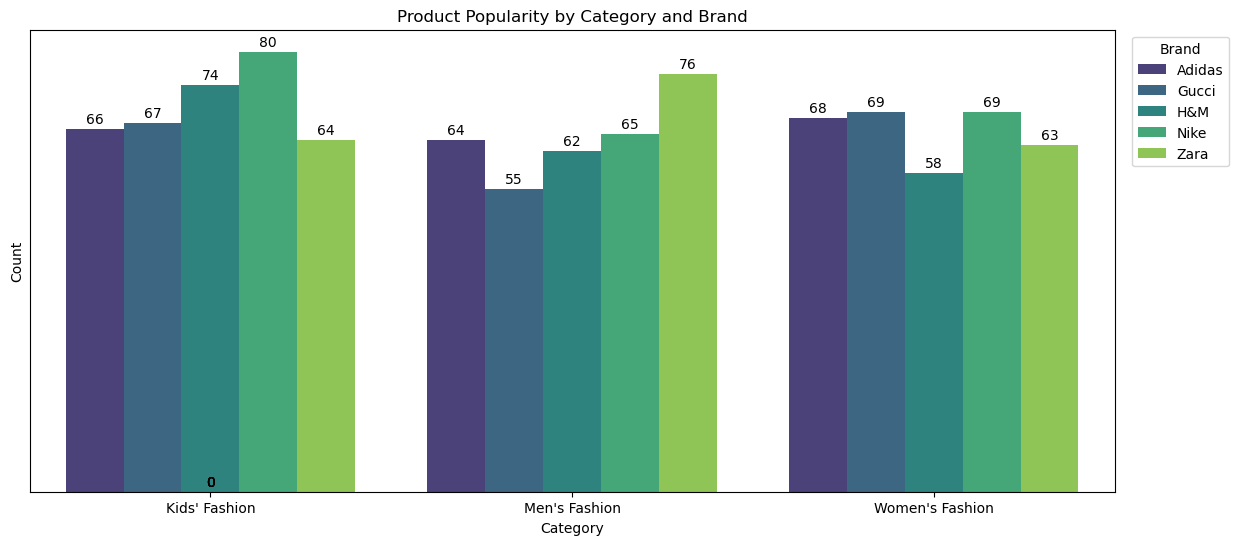

In [47]:
# Count the number of products in each category and brand combination
product_counts = df.groupby(['Category', 'Brand']).size().reset_index(name='Count')

# Create the count plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Category', y='Count', hue='Brand', data=product_counts, palette='viridis')
plt.title('Product Popularity by Category and Brand')
plt.xlabel('Category')
plt.ylabel('Count')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + p.get_width()/2, y + height+0.5), ha='center', va="bottom")

#Moving Legend
plt.legend(title='Brand', bbox_to_anchor=(1.01, 1), loc='upper left')

# Remove y-axis
plt.yticks([])

# Save the plot as a PNG file
plt.savefig('seaborn_plot4.png')

#Displaying chart
plt.show()

# Bar Plot Analysis: Product Popularity by Category and Brand
The barplot shows the popularity of various brands within specific fashion categories, with color intensity and numeric values representing purchase counts. Darker shades indicate higher popularity, while lighter shades represent lower popularity. Here’s an analysis of the findings:

#### 1. Highest Popularity:

- Nike in Kids' Fashion stands out as the most popular brand-category combination, with a purchase count of 80. This cell is the darkest shade of blue, indicating the highest level of popularity in the heatmap.
- Zara in Men's Fashion follows closely with a purchase count of 76. This high value suggests that Zara is a particularly favored brand among male customers.

#### 2. Moderate Popularity:

- Gucci and Nike in Women's Fashion both have purchase counts of 69, showing they are equally popular in this category. The colors are mid-tone, suggesting moderate popularity.
- Adidas in Women's Fashion and Zara in Kids' Fashion also have fairly high popularity with counts of 68 and 64, respectively. This highlights Adidas and Zara as reliable brands for these segments.

#### 3. Lower Popularity:

- Gucci in Men's Fashion has the lowest popularity with a purchase count of 55, shown by the lightest color in the heatmap. This indicates that Gucci is less favored among male customers.
- H&M in Women's Fashion has a lower purchase count of 58, indicating that H&M has less appeal in this specific category compared to others.

#### 4. Brand Trends by Category:

- Kids' Fashion: Nike dominates this category, with the highest purchase count (80). Other popular brands in Kids' Fashion include Zara (64) and Gucci (67).

- Men's Fashion: Zara is the most popular brand in this category, with a significant purchase count of 76. In contrast, Gucci has a relatively lower count of 55, suggesting Zara’s stronger appeal to male customers.

- Women's Fashion: Adidas and Gucci are strong competitors here, both with purchase counts around 68-69. H&M, however, has lower popularity within Women’s Fashion, with a count of 58, showing room for improvement in this segment.

In [49]:
data

,User_ID,Product,Brand,Category,Price,Rating_Scale,Color,Size,Rating
0,19,Dress,Adidas,Men's Fashion,40.0,1.0,Black,XL,Poor
1,97,Shoes,H&M,Women's Fashion,82.0,4.0,Black,L,Very Good
2,25,Dress,Adidas,Women's Fashion,44.0,3.3,Yellow,XL,Good
3,57,Shoes,Zara,Men's Fashion,23.0,1.0,White,S,Poor
4,79,T-shirt,Adidas,Men's Fashion,79.0,4.3,Black,M,Very Good
...,...,...,...,...,...,...,...,...,...
995,20,Shoes,Zara,Women's Fashion,55.0,1.6,Black,M,Poor
996,42,Sweater,Nike,Kids' Fashion,13.0,1.5,Green,L,Poor
997,9,Sweater,Zara,Men's Fashion,47.0,4.0,White,L,Very Good
998,8,T-shirt,Zara,Women's Fashion,68.0,3.1,Blue,S,Good


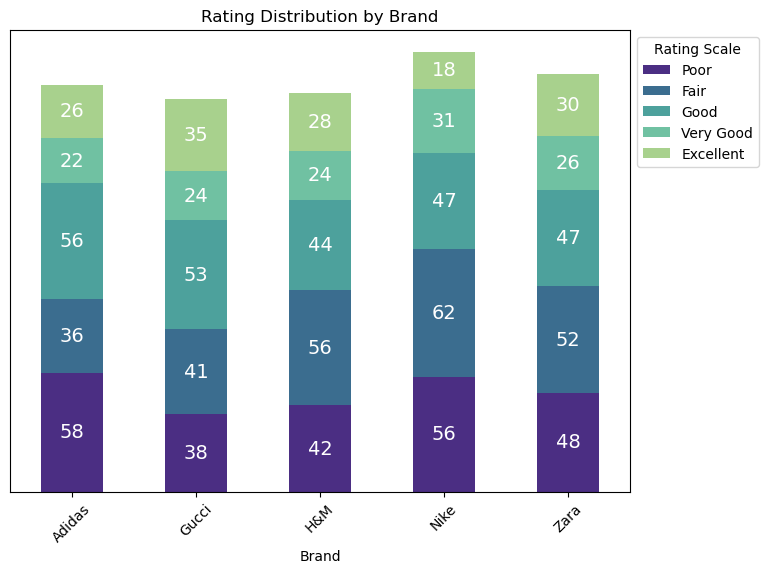

In [50]:
# Calculate the count of each rating per brand
rating_counts = data.groupby(['Brand', 'Rating']).size().unstack(fill_value=0)

# Define your custom colors with light green replacing yellow
custom_colors = ["#4B2E83", "#3B6D8F", "#4DA19C", "#70C1A2", "#A8D18D"] 


# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
rating_counts.plot(kind='bar', stacked=True, ax=ax, color=custom_colors)

plt.title('Rating Distribution by Brand')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.legend(title='Rating Scale', bbox_to_anchor=(1.0, 1), loc='upper left')

# Remove y-axis
ax.yaxis.set_visible(False)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d', fontsize=14, color='white')

# Save the plot as a PNG file
plt.savefig('seaborn_plot5.png')

#Displaying chart
plt.show()


#### 1. Adidas:

- The most common rating for Adidas products is "Poor," with 58 counts, shown in the deep purple section.
- "Fair" follows with 36 counts (blue).
- "Good" ratings are slightly more popular, with 56 counts (teal).
- Fewer ratings fall under "Very Good" with 22 counts (green), and "Excellent" has 26 counts (yellow).

#### 2. Gucci:

- Gucci has a slightly higher distribution of "Very Good" and "Excellent" ratings compared to Adidas.
- "Poor" has 38 counts (purple), the lowest among all brands for this rating.
- "Fair" follows with 41 counts (blue).
- The "Good" rating has the highest count for Gucci, with 53 (teal).
- "Very Good" and "Excellent" have 24 and 35 counts respectively (green and yellow).

#### 3. H&M:

- H&M shows a notable increase in "Excellent" ratings, with 28 counts (yellow).
- The "Poor" rating has a relatively higher frequency of 42 counts (purple).
- "Fair" and "Good" ratings are consistent at 44 and 56 counts, respectively.
- The "Very Good" rating is moderate, with 24 counts (green).

#### 4. Nike:

Nike stands out with a higher number of "Fair" ratings at 62 counts (blue), suggesting a balanced customer experience.
"Poor" ratings have 56 counts (purple).
"Good" ratings are moderate, with 47 counts (teal).
"Very Good" shows an increase at 31 counts (green).
"Excellent" has the fewest ratings at 18 counts (yellow).

#### 5. Zara:

- Zara has a fairly balanced distribution across "Good," "Very Good," and "Excellent" ratings.
- "Poor" has 48 counts (purple).
- "Fair" follows closely with 52 counts (blue).
- "Good" and "Very Good" ratings each have 47 counts (teal and green).
-"Excellent" has 30 counts, the highest among all brands for this category (yellow).

#### Summary:
Poor ratings dominate in Adidas and H&M, suggesting customer dissatisfaction is higher for these brands.
Nike stands out with a higher frequency of Fair ratings, indicating mixed reviews.
Zara and Gucci have more favorable distributions in higher ratings, with Gucci having a substantial count in the "Very Good" and "Excellent" categories.
This chart offers insight into brand performance based on customer ratings, showing that Gucci and Zara generally receive more positive feedback, while Adidas and H&M have a higher concentration of lower ratings.








## Hypothesis Testing

##### Scenario
Lavender Lane thinks that there is no difference in average rating across the different brands in stock. 
Further details have been provided in the documentation attached.

Null hypothesis (H0): Product categories do not influence the average rating.

Alternative hypothesis (H1): Product categories have a significant influence on the average rating. 

- Since our brand column had more than three independent groups and as shown in our Kernel Density, distribution is not a normal distribution, we used the Kruskal-Wallis test for our hypothesis. 
- if p <= alpha, reject hypothesis
- if p >= alpha, accept the hypothesis

In [55]:
#setting alpha to 0.05
alpha = 0.05

# Performing Kruskal-Wallis Test
kruskal_results = pingouin.kruskal(data=data, dv='Rating_Scale', between='Brand')
kruskal_results

,Source,ddof1,H,p-unc
Kruskal,Brand,4,6.857394,0.143619


The p-value is stored in the p-unc and p-unc shows a value of 0.143. So, we can go ahead to refer to p-unc as our p-value 

In [57]:
#saving our p-value as p and rounding off to 2 decimal place
p=round(kruskal_results["p-unc"], 2)
float(p)

0.14

In [58]:
#confirming null hypothesis
if (p <=alpha).all():
    print("REJECT NULL HYPOTHESIS")
else:
    print("There is no significant difference in the average rating across the different brands in stock")

There is no significant difference in the average rating across the different brands in stock


### MACHINE LEARNING

In [60]:
data.head()

,User_ID,Product,Brand,Category,Price,Rating_Scale,Color,Size,Rating
0,19,Dress,Adidas,Men's Fashion,40.0,1.0,Black,XL,Poor
1,97,Shoes,H&M,Women's Fashion,82.0,4.0,Black,L,Very Good
2,25,Dress,Adidas,Women's Fashion,44.0,3.3,Yellow,XL,Good
3,57,Shoes,Zara,Men's Fashion,23.0,1.0,White,S,Poor
4,79,T-shirt,Adidas,Men's Fashion,79.0,4.3,Black,M,Very Good


In [61]:
# List of categorical columns to encode
X = data[['Product', 'Brand', 'Category']]
y = data["Price"]

                  
# Encode each categorical column using One-hot encoding for 'Product', 'Brand', and 'Category' columns
data_encoded = pd.get_dummies(X, columns=['Product', 'Brand', 'Category'], dtype=int)

In [62]:
#previewing data
data_encoded 

,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,Brand_Zara,Category_Kids' Fashion,Category_Men's Fashion,Category_Women's Fashion
0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,0,0,0,0,1,0,0,1
996,0,0,0,1,0,0,0,0,1,0,1,0,0
997,0,0,0,1,0,0,0,0,0,1,0,1,0
998,0,0,0,0,1,0,0,0,0,1,0,0,1


In [63]:
#encoding kids as 0, women as 1 and men as 2
data_encoded["Category_Men's Fashion"] = data_encoded["Category_Men's Fashion"].replace(1, 2) #men
data_encoded["Category_Men's Fashion"]

0      2
1      0
2      0
3      2
4      2
      ..
995    0
996    0
997    2
998    0
999    0
Name: Category_Men's Fashion, Length: 1000, dtype: int32

In [64]:
#merging individual encoded category into one
data_encoded["Category_merge"] = np.where(data_encoded["Category_Men's Fashion"] != 0, data_encoded["Category_Men's Fashion"], data_encoded["Category_Women's Fashion"])
data_encoded["Category_merge"] # men = 2, women = 1 and kids = 0

0      2
1      1
2      1
3      2
4      2
      ..
995    1
996    0
997    2
998    1
999    1
Name: Category_merge, Length: 1000, dtype: int32

In [65]:
data_encoded

,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,Brand_Zara,Category_Kids' Fashion,Category_Men's Fashion,Category_Women's Fashion,Category_merge
0,1,0,0,0,0,1,0,0,0,0,0,2,0,2
1,0,0,1,0,0,0,0,1,0,0,0,0,1,1
2,1,0,0,0,0,1,0,0,0,0,0,0,1,1
3,0,0,1,0,0,0,0,0,0,1,0,2,0,2
4,0,0,0,0,1,1,0,0,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,0,0,0,0,1,0,0,1,1
996,0,0,0,1,0,0,0,0,1,0,1,0,0,0
997,0,0,0,1,0,0,0,0,0,1,0,2,0,2
998,0,0,0,0,1,0,0,0,0,1,0,0,1,1


In [66]:
#since category is merged into one, drop individual category
data_cleaned = data_encoded.drop(columns = ["Category_Kids' Fashion", "Category_Men's Fashion", "Category_Women's Fashion"])
data_cleaned

,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,Brand_Zara,Category_merge
0,1,0,0,0,0,1,0,0,0,0,2
1,0,0,1,0,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,2
4,0,0,0,0,1,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,0,0,0,0,1,1
996,0,0,0,1,0,0,0,0,1,0,0
997,0,0,0,1,0,0,0,0,0,1,2
998,0,0,0,0,1,0,0,0,0,1,1


In [67]:
#creating encoded labels for brand Zara
data_cleaned['Brand_Zara'] = data_cleaned['Brand_Zara'].replace(1, 5) #zara
data_cleaned['Brand_Zara']  #Zara = 5

0      0
1      0
2      0
3      5
4      0
      ..
995    5
996    0
997    5
998    5
999    0
Name: Brand_Zara, Length: 1000, dtype: int32

In [68]:
#creating encoded labels for brand Nike
data_cleaned['Nike_Zara'] = np.where(data_cleaned['Brand_Zara'] != 0, data_cleaned['Brand_Zara'], data_cleaned['Brand_Nike'])
data_cleaned['Nike_Zara'] = data_cleaned['Nike_Zara'].replace(1, 4) 
data_cleaned['Nike_Zara']       #Nike = 4

0      0
1      0
2      0
3      5
4      0
      ..
995    5
996    4
997    5
998    5
999    0
Name: Nike_Zara, Length: 1000, dtype: int32

In [69]:
#creating encoded labels for brand H&M
data_cleaned['Nike_Zara_H&M'] = np.where(data_cleaned['Nike_Zara'] != 0, data_cleaned['Nike_Zara'], data_cleaned['Brand_H&M'])
data_cleaned['Nike_Zara_H&M'] = data_cleaned['Nike_Zara_H&M'].replace(1, 3)
data_cleaned['Nike_Zara_H&M']    #H&M = 3

0      0
1      3
2      0
3      5
4      0
      ..
995    5
996    4
997    5
998    5
999    0
Name: Nike_Zara_H&M, Length: 1000, dtype: int32

In [70]:
#creating encoded labels for brand Gucci
data_cleaned['Nike_Zara_H&M_Gucci'] = np.where(data_cleaned['Nike_Zara_H&M']  != 0, data_cleaned['Nike_Zara_H&M'] , data_cleaned['Brand_Gucci'])
data_cleaned['Nike_Zara_H&M_Gucci'] = data_cleaned['Nike_Zara_H&M'].replace(1, 2)
data_cleaned['Nike_Zara_H&M_Gucci']    #Gucci = 2

0      0
1      3
2      0
3      5
4      0
      ..
995    5
996    4
997    5
998    5
999    0
Name: Nike_Zara_H&M_Gucci, Length: 1000, dtype: int32

In [71]:
#creating encoded labels for brand Adidas
data_cleaned['Nike_Zara_H&M_Gucci_Adidas'] = np.where(data_cleaned['Nike_Zara_H&M_Gucci']  != 0, data_cleaned['Nike_Zara_H&M_Gucci'] , data_cleaned['Brand_Adidas'])
data_cleaned['Nike_Zara_H&M_Gucci_Adidas']    #Adidas = 1

0      1
1      3
2      1
3      5
4      1
      ..
995    5
996    4
997    5
998    5
999    1
Name: Nike_Zara_H&M_Gucci_Adidas, Length: 1000, dtype: int32

In [72]:
#since brand is merged into one, drop individual brands
data_clean = data_cleaned.drop(columns = ["Brand_Adidas", "Brand_Gucci", "Brand_H&M","Brand_Zara", "Brand_Nike", 
                                          "Nike_Zara", "Nike_Zara_H&M", "Nike_Zara_H&M_Gucci"])

#rename the brands merged as Brands_merged
data_clean.rename(columns ={"Nike_Zara_H&M_Gucci_Adidas": "Brands_merged"}, inplace= True)
data_clean

,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Category_merge,Brands_merged
0,1,0,0,0,0,2,1
1,0,0,1,0,0,1,3
2,1,0,0,0,0,1,1
3,0,0,1,0,0,2,5
4,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...
995,0,0,1,0,0,1,5
996,0,0,0,1,0,0,4
997,0,0,0,1,0,2,5
998,0,0,0,0,1,1,5


In [73]:
#saving features as X
X = data_clean
y = data["Price"]

In [74]:
#preview y
y

0      40.0
1      82.0
2      44.0
3      23.0
4      79.0
       ... 
995    55.0
996    13.0
997    47.0
998    68.0
999    79.0
Name: Price, Length: 1000, dtype: float64

In [75]:
#Splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### DECISION TREE MODEL


In [77]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
#training our model using classifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
#making predictions with our test data
predictions = model.predict(X_test)
predictions     #predicting prices

array([22., 24., 11., 17., 31., 19., 49., 10., 68., 19., 72., 62., 43.,
       85., 24., 16., 68., 11., 94., 62., 16., 37., 29., 74., 11., 74.,
       10., 30., 59., 33., 10., 43., 16., 21., 72., 85., 62., 67., 35.,
       28., 17., 14., 30., 11., 11., 14., 15., 27., 34., 20., 19., 11.,
       73., 35., 11., 41., 85., 49., 10., 21., 10., 10., 14., 67., 67.,
       27., 27., 19., 10., 43., 11., 11., 73., 10., 30., 16., 19., 34.,
       67., 34., 72., 73., 19., 91., 24., 34., 85., 11., 17., 19., 24.,
       41., 33., 21., 19., 14., 62., 25., 85., 11., 59., 10., 10., 11.,
       85., 15., 21., 14., 74., 28., 35., 21., 14., 13., 27., 24., 11.,
       16., 17., 18., 28., 20., 74., 11., 11., 44., 91., 11., 10., 20.,
       49., 67., 17., 21., 11., 72., 10., 85., 14., 10., 73., 11., 44.,
       19., 16., 11., 17., 21., 72., 28., 28., 94., 12., 67., 16., 37.,
       24., 16., 60., 15., 21., 30., 14., 14., 72., 60., 85., 41., 94.,
       19., 34., 29., 21., 10., 21., 94., 72., 10., 30., 10., 17

In [161]:
#predicting price if products are shoes and T-shirt, category is men's fashion and brand is H&M
#Order of features are Dress, Jeans, Shoes, Sweater, T-shirt, Category, Brand
predict = model.predict([[0, 0, 1, 0, 1, 2, 3]])
predict   #predicted price

array([72.])

#### Training our model using Regressor

In [81]:
#Instantiate the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

#Train our linear regression model
reg1= dt_regressor.fit(X_train,y_train)
reg1

DecisionTreeRegressor(random_state=42)

In [82]:
y_pred= reg1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 27.512231362244982


## Linear Regression

In [84]:
#Instantiate the linear regression model
lr = LinearRegression()

#Train our linear regression model
reg= lr.fit(X_train,y_train)
reg

LinearRegression()

In [85]:
y_pred= reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 26.712012604142036


### RANDOM FOREST MODEL

In [87]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the model
rf_model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=7, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions and evaluate RMSE
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 27.197632565983227


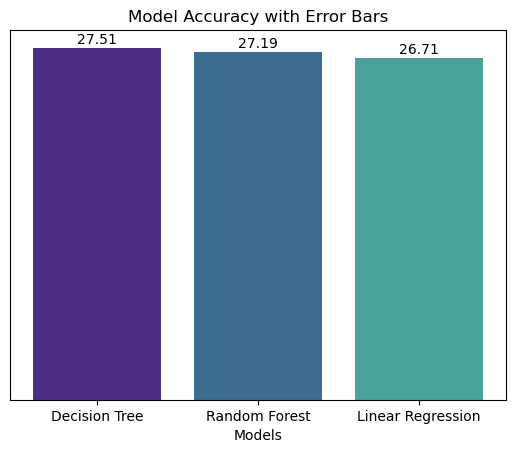

In [155]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mean_accuracy = [26.71, 27.51, 27.19]

# Sort the data in descending order of mean_accuracy
sorted_indices = np.argsort(mean_accuracy)[::-1]
models = [models[i] for i in sorted_indices]
mean_accuracy = [mean_accuracy[i] for i in sorted_indices]


#Plotting a bar chart
plt.bar(models, mean_accuracy, capsize=5, color=["#4B2E83", "#3B6D8F", "#4DA19C"])
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Model Accuracy with Error Bars')

# Add data labels
for i, value in enumerate(mean_accuracy):
    plt.text(i, value + 0.3, f'{value:.2f}', ha='center')

# Removing y-axis
plt.gca().axes.get_yaxis().set_visible(False)

#Displaying Chart
plt.show()

### MACHINE LEARNING ANALYSIS

For this project, we implemented machine learning to predict the prices of our clients' products. We evaluated three different models for this purpose:

- Linear Regression
- Decision Tree
- Random Forest

After comparing results from each model, we selected the Linear Regression model as the most accurate, as it produced the lowest Root Mean Squared Error (RMSE) of 26.87. This was slightly better than the RMSEs of the Decision Tree (27.51) and Random Forest (27.31) models. The RMSE from the Linear Regression model indicates that, on average, our price predictions were within $26 off the actual prices.

### Conclusion

The data analysis reveals several key insights into the Lavender Lane brand’s performance across products, categories, and brands. There is a clear opportunity to enhance customer satisfaction by focusing on Kids' Fashion, where there is variability in ratings, indicating potential quality inconsistencies. Stable categories like Men’s and Women’s Fashion show room for incremental improvements to further elevate their appeal.

Popular products like Jeans, Shoes, and Sweaters can be promoted as flagship items, while targeted marketing on preferred colors and sizes can help meet customer expectations more precisely. Brands like Gucci and Zara, with higher positive ratings, can be used to build brand loyalty and upsell premium products. Conversely, focusing on quality improvements for Adidas and H&M could help balance out their rating distribution, making them more competitive in the market.

In summary, by leveraging these insights and implementing targeted improvements, the brand can enhance customer experience, optimize inventory, and potentially increase sales across product categories and brands.


### Recommendations

1. Improve Kids' Fashion Quality and Consistency:
Since Kids' Fashion shows the most variability in ratings, consider investigating the products in this category to understand the root causes of customer dissatisfaction. Conduct surveys or gather feedback on specific aspects such as durability, comfort, and design. Implementing stricter quality control measures or refining product designs could help improve overall ratings and customer satisfaction in this category.

2. Enhance Product Appeal in Men’s and Women’s Fashion:
Although Men’s and Women’s Fashion have relatively stable ratings, Men's Fashion could benefit from incremental quality improvements to bring its ratings closer to Women’s Fashion. Investing in product development to add innovative features or improve comfort and style may attract more positive ratings, helping these categories compete with the high satisfaction seen in other segments.

3. Adjust Marketing Focus Based on Product and Category Popularity:
Since Jeans, Shoes, and Sweaters are the most popular products, consider allocating a larger portion of the marketing budget to these items, potentially highlighting these as key products across campaigns. Likewise, an emphasis on Kids' Fashion, which outperforms other categories in terms of quantity sold, could further strengthen its presence and drive sales in this segment.

4. Introduce Targeted Promotions for Colors and Sizes in High Demand:
White is the most popular color across products, suggesting a strong preference among customers. Consider introducing new styles or special editions featuring white as a primary color to boost appeal. Additionally, understanding that different sizes are favored within categories (e.g., large sizes in Kids' Fashion and small sizes in Men’s Fashion) can help optimize inventory management and meet customer demand more effectively.
   
5. Increase Marketing and Product Development for Sweaters and Dresses:
Since Sweaters and Dresses have slightly lower average prices than other products, investing in enhanced marketing or value-added features (like improved fabric quality or design variety) could make these products more appealing, potentially raising their sales. This effort could help bring their performance in line with higher-priced items like Shoes and T-Shirts.
   
6. Enhance the Reputation of Lower-Rated Brands (e.g., Adidas, H&M):
Adidas and H&M show a concentration of "Poor" and "Fair" ratings, which may indicate customer dissatisfaction. Addressing these concerns with improvements in product quality, customer service, or brand transparency could help enhance their reputation. Offering targeted promotions or customer loyalty incentives for these brands might also encourage repeat purchases and boost their ratings.

7. Leverage Positive Brand Ratings (Gucci and Zara) for Upselling:
Gucci and Zara generally receive better ratings, especially with higher counts in "Very Good" and "Excellent" categories. Use these positive brand perceptions to introduce premium lines or limited-edition products under these brands. Highlighting customer reviews in marketing materials could further reinforce their reputation and encourage higher sales.

8. Tailor Inventory Based on Popular Size Demand:
Since there are distinct size preferences within each fashion category, stock more of the high-demand sizes (e.g., large sizes for Kids' Fashion, small sizes for Men’s Fashion, and extra-large for Women's Fashion). This approach can help reduce stockouts and improve customer satisfaction by ensuring that popular sizes are consistently available.